In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names

In [18]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'income']


# Load dataset

In [19]:
df = pd.read_csv('adult.data', header=None, names=column_names,
                 na_values=' ?', skipinitialspace=True)

# Drop missing values

In [20]:
df = df.dropna()

# Rename column to avoid issues with '-'

In [21]:
df.rename(columns={'education-num': 'education_num'}, inplace=True)

# Binary target variable

In [22]:
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Logistic Regression model

In [23]:
logit_model = smf.logit('income_binary ~ education_num', data=df)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.489871
         Iterations 6


# Print summary

In [24]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:          income_binary   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32559
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.1126
Time:                        07:18:13   Log-Likelihood:                -15951.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.0197      0.071    -70.934      0.000      -5.158      -4.881
education_num     0.3643      0.006     58.031      0.000       0.352       0.377


# Predicted probabilities

In [25]:
df['predicted_prob'] = logit_results.predict(df)

# Scatter plot with logistic curve

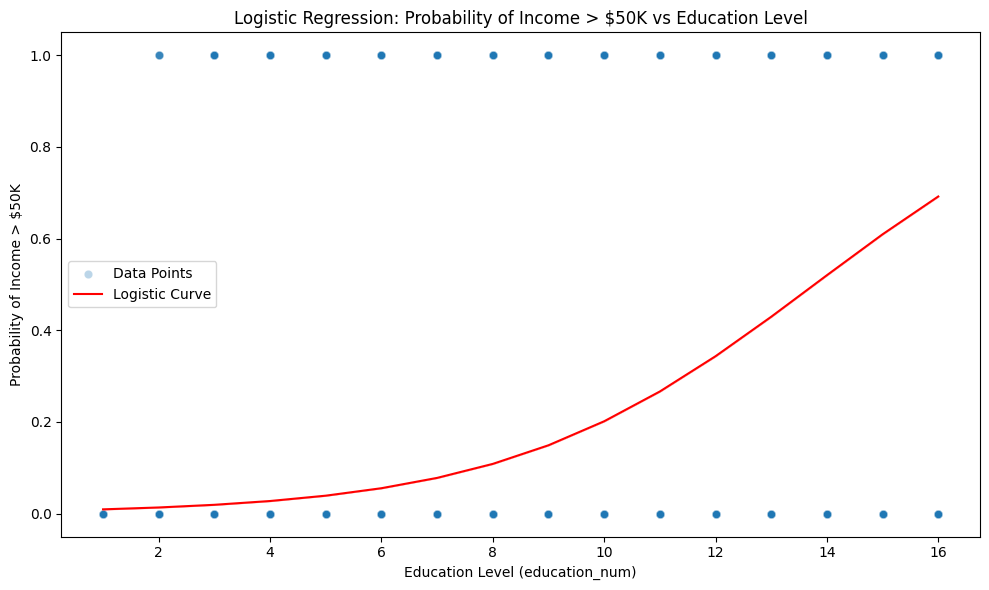

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education_num', y='income_binary', data=df, alpha=0.3, label='Data Points')
sns.lineplot(x='education_num', y='predicted_prob', data=df, color='red', label='Logistic Curve')
plt.title('Logistic Regression: Probability of Income > $50K vs Education Level')
plt.xlabel('Education Level (education_num)')
plt.ylabel('Probability of Income > $50K')
plt.legend()
plt.tight_layout()
plt.show()

# **Coefficients**
# p-values
# McFadden's Pseudo R-squared

In [27]:
print("Coefficients:\n", logit_results.params)
print("\nP-values:\n", logit_results.pvalues)
llf = logit_results.llf      # log-likelihood of fitted model
llnull = logit_results.llnull  # log-likelihood of null model
pseudo_r2 = 1 - (llf / llnull)
print("McFadden's Pseudo R-squared:", pseudo_r2)

Coefficients:
 Intercept       -5.019731
education_num    0.364295
dtype: float64

P-values:
 Intercept        0.0
education_num    0.0
dtype: float64
McFadden's Pseudo R-squared: 0.11257097203443256
